In [2]:
import pandas as pd

data = pd.read_csv('data_without_null')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
GOA = data.loc[(data['SUBDIVISION'] == 'KONKAN & GOA')]
GOA.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2493,KONKAN & GOA,1901,5.6,0.1,0.4,35.7,19.9,746.1,1075.5,748.0,117.4,38.6,5.4,0.1,2792.9,5.7,56.0,2687.0,44.1
2494,KONKAN & GOA,1902,0.3,0.0,0.0,0.4,7.6,428.2,943.6,515.1,613.8,74.3,42.7,48.0,2673.9,0.3,8.0,2500.6,165.0
2495,KONKAN & GOA,1903,0.0,0.0,0.1,0.0,201.1,470.5,1298.6,673.9,285.1,140.8,12.4,1.7,3084.3,0.0,201.2,2728.2,154.9
2496,KONKAN & GOA,1904,0.0,0.1,6.6,6.3,4.6,975.8,771.7,321.3,217.0,90.3,0.0,0.0,2393.7,0.1,17.5,2285.8,90.3
2497,KONKAN & GOA,1905,0.1,0.1,0.0,0.4,8.6,293.7,770.6,305.5,208.3,83.5,12.1,0.0,1682.8,0.2,9.0,1578.1,95.5


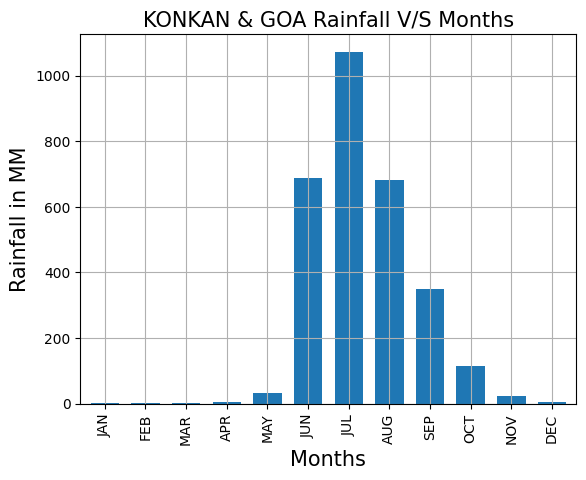

In [9]:
import matplotlib.pyplot as plt

GOA[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.7,linewidth=3)
plt.title("KONKAN & GOA Rainfall V/S Months",size=15)
plt.xlabel("Months",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid(axis="both",linestyle="-")
plt.show()

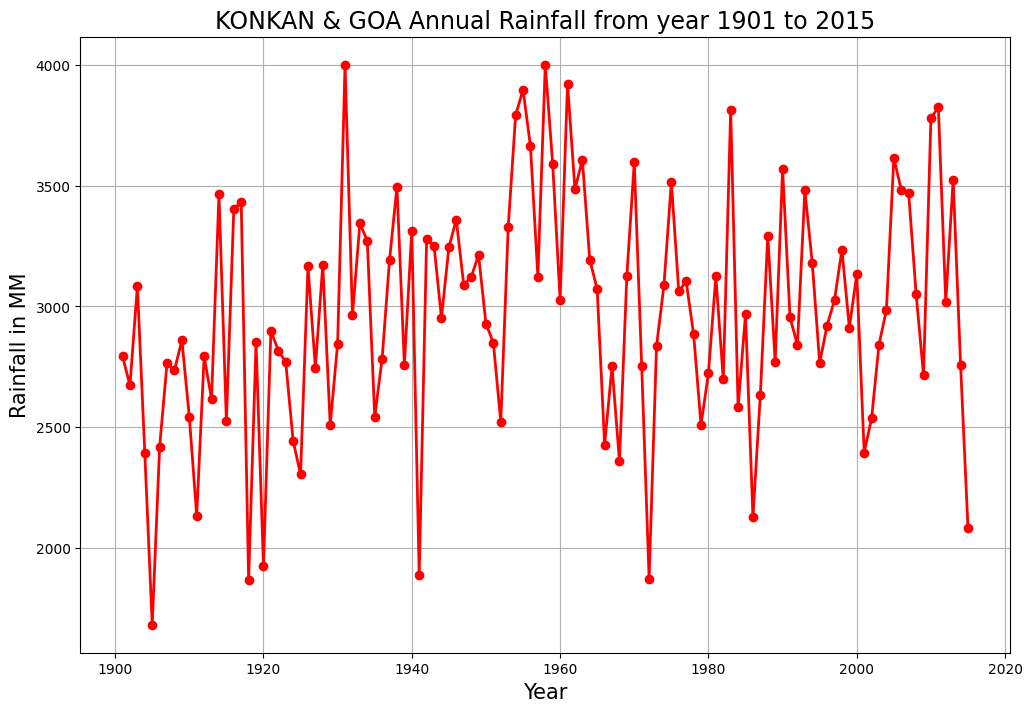

In [10]:
GOA.groupby("YEAR").sum()['ANNUAL'].plot(color='r',marker="o",linestyle='-',linewidth=2,figsize=(12,8))
plt.title("KONKAN & GOA Annual Rainfall from year 1901 to 2015",size=17)
plt.xlabel("Year",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid()
plt.show()

In [11]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group(('KONKAN & GOA'))

df = data.melt(['YEAR']).reset_index()

df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])

df.columns=['Index','Year','Month','Avg Rainfall']

monthMap = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df['Month'].map(monthMap)

df.drop(columns="Index",inplace=True)

df.head(10)

,Year,Month,Avg Rainfall
0,1901,1,5.6
115,1901,2,0.1
230,1901,3,0.4
345,1901,4,35.7
460,1901,5,19.9
575,1901,6,746.1
690,1901,7,1075.5
805,1901,8,748.0
920,1901,9,117.4
1035,1901,10,38.6


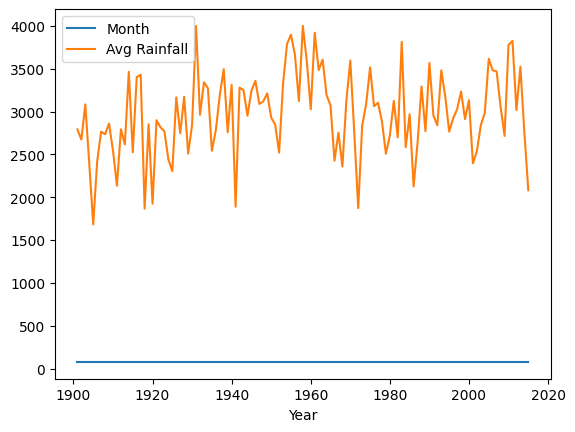

In [12]:
df.groupby("Year").sum().plot()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_24100\4153292416.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])


<Axes: ylabel='Avg Rainfall'>

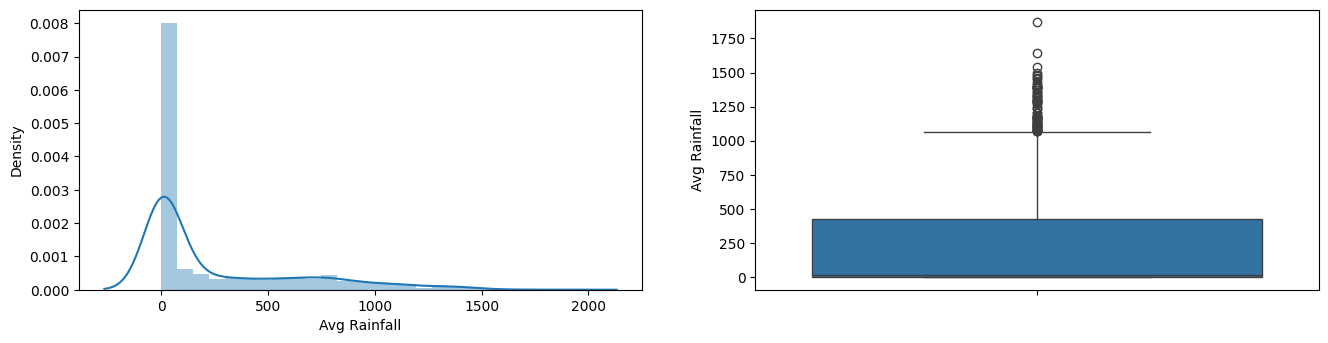

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

In [14]:
percentile25 = df['Avg Rainfall'].quantile(0.25)
percentile75 = df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg Rainfall'] > upper_limit]
df[df['Avg Rainfall'] < lower_limit]

new_df = df[df['Avg Rainfall'] < upper_limit]
new_df.shape

(1305, 3)

In [15]:
percentile25 = new_df['Avg Rainfall'].quantile(0.25)
percentile75 = new_df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df[new_df['Avg Rainfall'] > upper_limit]
new_df[new_df['Avg Rainfall'] < lower_limit]

new_df2 = new_df[new_df['Avg Rainfall'] < upper_limit]
new_df2.shape

(1200, 3)

In [19]:
percentile25 = new_df2['Avg Rainfall'].quantile(0.25)
percentile75 = new_df2['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df2[new_df2['Avg Rainfall'] > upper_limit]
new_df2[new_df2['Avg Rainfall'] < lower_limit]

new_df3 = new_df2[new_df2['Avg Rainfall'] < upper_limit]
new_df3.shape

(1031, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_24100\1473949475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_24100\1473949475.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])


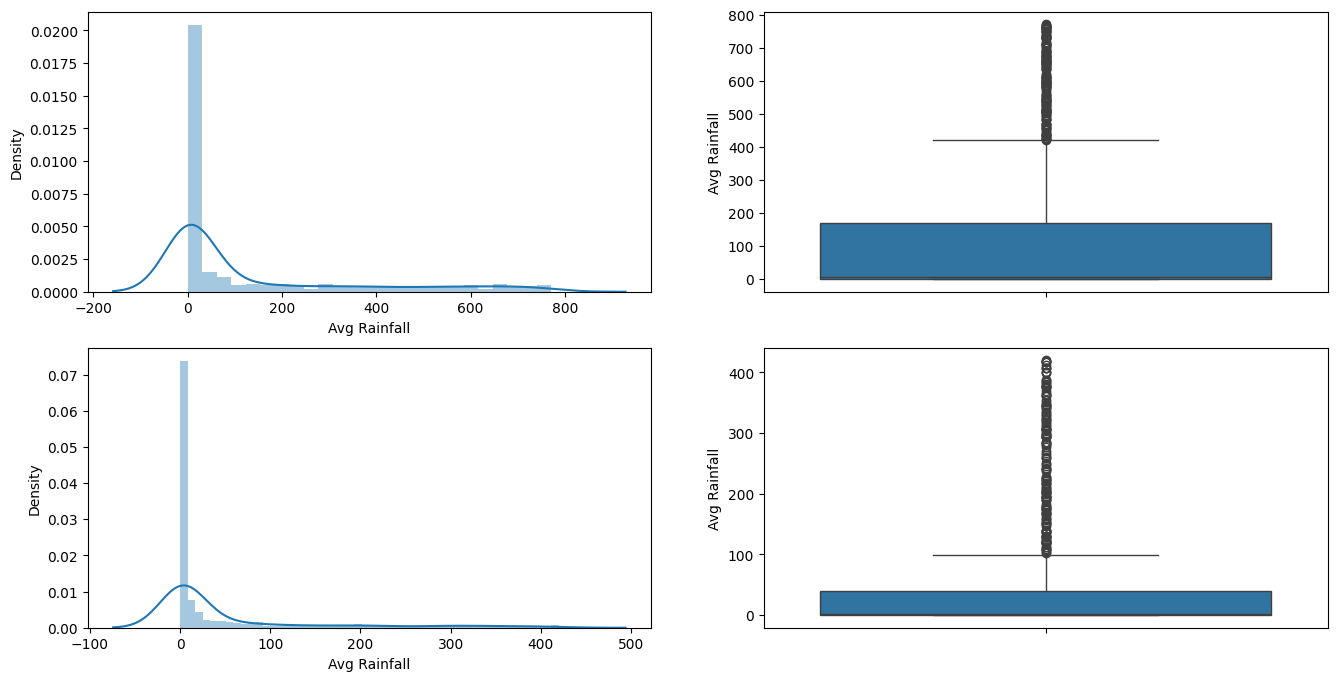

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df2['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df3['Avg Rainfall'])
plt.show()

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asanyarray(new_df3[['Year','Month']]).astype('int')
Y = np.asanyarray(new_df3['Avg Rainfall']).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

(1031, 2)
(1031,)


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, Y_train)

y_train_predict = knn_model.predict(X_train)
y_test_predict = knn_model.predict(X_test)

predicted = knn_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value : ", predicted)

R-squared score on training data: 0.72016180752732
R-squared score on test data: 0.3958797564565908
Predicted value :  [1.]


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_forest_model = RandomForestRegressor(n_estimators=50, random_state=45)
random_forest_model.fit(X_train, Y_train)

y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

predicted = random_forest_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value ", predicted)

R-squared score on training data: 0.9602079701260412
R-squared score on test data: 0.7151834651643575
Predicted value  [3.1]


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

predicted = linear_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)
test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted)

R-squared score on training data: 0.10037050273063441
R-squared score on test data: 0.07609752026818384
Predicted value: [10.21439762]


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree_model = DecisionTreeRegressor(random_state=45)
decision_tree_model.fit(X_train, Y_train)

y_train_predict = decision_tree_model.predict(X_train)
y_test_predict = decision_tree_model.predict(X_test)

predicted = decision_tree_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted[0])

R-squared score on training data: 1.0
R-squared score on test data: 0.6280208622772683
Predicted value: 5.0


In [26]:
import pickle

pickle.dump(decision_tree_model,open('goa_decesion_tree_model.pkl','wb'))
pickel_model = pickle.load(open('goa_decesion_tree_model.pkl','rb'))

pickel_model.predict([[1901, 1]])

array([5.])